In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.cluster import KMeans
import pickle

#Import data
wine_df = pd.read_csv('static/data/winemag.csv')
wine_df.head(5)

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,84,Broke Ass 2009 Red Malbec-Syrah (Mendoza),"Crimson in color but also translucent, with a ...",Michael Schachner,@wineschach,4.0,Red,Malbec-Syrah,Mendoza,NaN,Mendoza Province,Argentina,Broke Ass
1,84,Terrenal 2010 Cabernet Sauvignon (Yecla),This opens with standard cherry and berry arom...,Michael Schachner,@wineschach,4.0,NaN,Cabernet Sauvignon,Yecla,NaN,Levante,Spain,Terrenal
2,86,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Notes of sun-dried hay and green flower highli...,Anna Lee C. Iijima,NaN,4.0,UnWineD,Pinot Grigio,NaN,NaN,Viile Timisului,Romania,Cramele Recas
3,86,Bandit NV Merlot (California),"There's a lot going on in this Merlot, which i...",NaN,NaN,4.0,NaN,Merlot,California,California Other,California,United States,Bandit
4,82,Felix Solis 2012 Flirty Bird White (Vino de la...,"Tropical fruit and citrus aromas aren't bad, b...",Michael Schachner,@wineschach,4.0,Flirty Bird,White Blend,Vino de la Tierra de Castilla,NaN,Central Spain,Spain,Felix Solis


In [2]:
wine_df.describe(include='all',)

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
count,111511.000000,111511,111511,88244,83761,111511.000000,79472,111511,93556,46559,111511,111511,111511
unique,NaN,110556,111511,19,15,NaN,35746,691,1204,17,422,42,15842
top,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,"Exotic and enticing at first, with penetrating...",Roger Voss,@vossroger,NaN,Reserve,Pinot Noir,Napa Valley,Central Coast,California,United States,Williams Selyem
freq,NaN,9,1,18543,18543,NaN,1844,11832,4170,10149,33520,50229,204
mean,88.413905,NaN,NaN,NaN,NaN,35.626073,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3.099332,NaN,NaN,NaN,NaN,42.116495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,80.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,86.000000,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,88.000000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,91.000000,NaN,NaN,NaN,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
wine_df.describe(include=['O'],).T

,count,unique,top,freq
title,111511,110556,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,9
description,111511,111511,"Exotic and enticing at first, with penetrating...",1
taster_name,88244,19,Roger Voss,18543
taster_twitter_handle,83761,15,@vossroger,18543
designation,79472,35746,Reserve,1844
variety,111511,691,Pinot Noir,11832
region_1,93556,1204,Napa Valley,4170
region_2,46559,17,Central Coast,10149
province,111511,422,California,33520
country,111511,42,United States,50229


/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


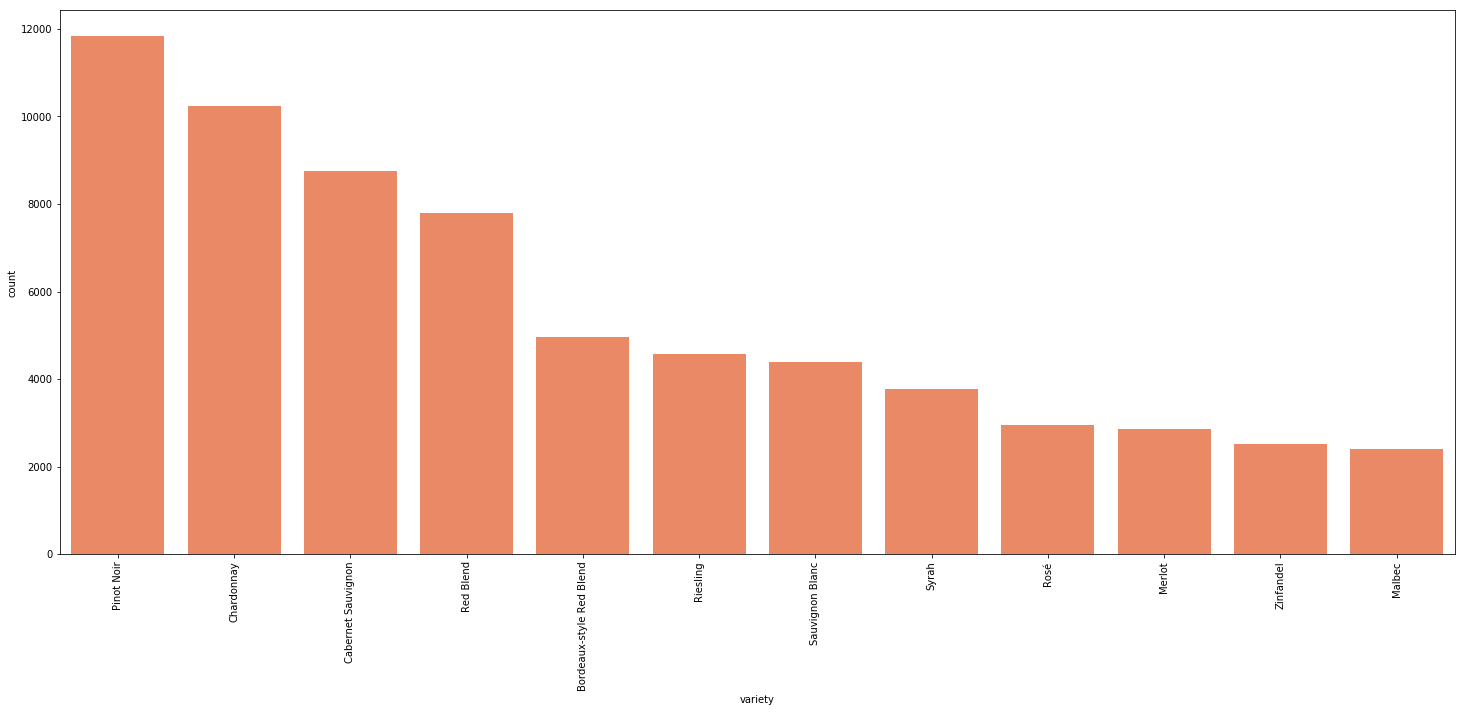

In [4]:

v_df = wine_df.groupby('variety').filter(lambda x: len(x) > 2200)
varieties = v_df['variety'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = v_df['variety'], order = varieties, ax = ax, color = 'coral')
plt.xticks(rotation = 90)
plt.show()

In [5]:
v_df['variety'].unique()

array(['Cabernet Sauvignon', 'Merlot', 'Chardonnay', 'Syrah', 'Rosé',
       'Riesling', 'Sauvignon Blanc', 'Red Blend', 'Malbec', 'Zinfandel',
       'Pinot Noir', 'Bordeaux-style Red Blend'], dtype=object)

In [6]:
v_df.head(2)

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
1,84,Terrenal 2010 Cabernet Sauvignon (Yecla),This opens with standard cherry and berry arom...,Michael Schachner,@wineschach,4.0,NaN,Cabernet Sauvignon,Yecla,NaN,Levante,Spain,Terrenal
3,86,Bandit NV Merlot (California),"There's a lot going on in this Merlot, which i...",NaN,NaN,4.0,NaN,Merlot,California,California Other,California,United States,Bandit


In [142]:
stopwords2 = nltk.corpus.stopwords.words('english')
stopwords2.extend(['flavor','flavors','nose','aromas','finish','palate', 'alongside','offers','feels','notes','structure','like','well'])

In [143]:
stopwords2

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
vectorizer = TfidfVectorizer(stop_words = stopwords2, ngram_range=(3,3))
vectorizer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',... 'aromas', 'finish', 'palate', 'alongside', 'offers', 'feels', 'notes', 'structure', 'like', 'well'],
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [10]:
descriptions = v_df['description'].values
descriptions

array([ "This opens with standard cherry and berry aromas before transitioning to a juicy palate with red berry, plum, herb and grass notes. It finishes a little hot and aggressive, but for $4 who's complaining?",
       "There's a lot going on in this Merlot, which is likeable now for its rich blackberry, cherry, cranberry, cola and spice flavors. It's dry and balanced.",
       'A good everyday Merlot, dry and rich in tannins, with pleasant cherry, cocoa, licorice, herb and spice flavors.',
       ...,
       'A superb wine from a great year, this is powerful and structured, with great acidity and solid, pronounced fruits. La Romanée is a small vineyard, wholly owned by Liger-Belair, next to Romanée-Conti. The wine is rich, spicy and very complex, with black fruits welling up from its depth. With great structure, it brings together opulent Pinot Noir fruits with firm, dense tannins with immense aging potential.',
       'The wine is a velvet glove in an iron fist. The smooth surface 

In [11]:
X = vectorizer.fit_transform(descriptions)
X

<67043x1755306 sparse matrix of type '<class 'numpy.float64'>'
	with 4510410 stored elements in Compressed Sparse Row format>

In [19]:
true_k = 12
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=10)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=12, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=12, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [21]:
order_centroids= model.cluster_centers_.argsort()[:,::-1]
order_centroids

array([[ 861165,  886996, 1258164, ..., 1057965, 1057966,  877652],
       [ 171621,  172071,  302013, ..., 1143150, 1143151,  877652],
       [ 641766, 1686788,  302013, ..., 1024184, 1024185,  877652],
       ..., 
       [ 948532,  948448,  201004, ..., 1150037, 1150038, 1755305],
       [1125555, 1126816, 1021494, ..., 1155068, 1155069,  877652],
       [ 676423,  676061,  201004, ..., 1149772, 1149773,  877652]])

In [22]:
terms=vectorizer.get_feature_names()
terms

['000',
 '000 12',
 '000 12 000',
 '000 400',
 '000 400 foot',
 '000 700',
 '000 700 000',
 '000 acre',
 '000 acre estate',
 '000 bottles',
 '000 bottles 100',
 '000 bottles produced',
 '000 case',
 '000 case product',
 '000 case production',
 '000 case wine',
 '000 cases',
 '000 cases across',
 '000 cases amazing',
 '000 cases baked',
 '000 cases bargain',
 '000 cases believed',
 '000 cases buyers',
 '000 cases cabernet',
 '000 cases chardonnay',
 '000 cases circulation',
 '000 cases clearly',
 '000 cases dry',
 '000 cases easy',
 '000 cases exceptional',
 '000 cases fairly',
 '000 cases fine',
 '000 cases friendly',
 '000 cases good',
 '000 cases hard',
 '000 cases imported',
 '000 cases made',
 '000 cases merlot',
 '000 cases might',
 '000 cases price',
 '000 cases produced',
 '000 cases quality',
 '000 cases released',
 '000 cases remarkable',
 '000 cases sauvignon',
 '000 cases seem',
 '000 cases selling',
 '000 cases size',
 '000 cases solid',
 '000 cases strong',
 '000 cases ter

In [23]:

for i in range(true_k):
    print("Cluster %d" %i),
    for ind in order_centroids[i,:12]:
        print('%s'%terms[ind]),
    print
print("\n")
print("Prediction")
Y=vectorizer.transform(["zinfandel"])
prediction=model.predict(Y)
print(prediction)

Cluster 0
lemon
lime
riesling
peach
dry
apple
acidity
fresh
white
grapefruit
tangerine
citrus
Cluster 1
black
black cherry
cherry
tannins
pepper
plum
spice
black pepper
fruit
dark
dried
blackberry
Cluster 2
fruit
wine
cherry
red
light
tannins
raspberry
spice
oak
vineyard
dark
acidity
Cluster 3
chardonnay
pineapple
tropical
apple
oak
buttered
vanilla
toast
pear
acidity
buttered toast
fruit
Cluster 4
wine
drink
fruits
acidity
ripe
tannins
wood
fruity
character
fruit
ready
ready drink
Cluster 5
blackberry
dry
tannins
blackberries
cherries
years
oak
sweet
rich
wine
currants
currant
Cluster 6
berry
plum
herbal
oak
red
blackberry
spice
fruit
cassis
earthy
spicy
black
Cluster 7
green
blanc
sauvignon blanc
citrus
sauvignon
apple
green apple
lime
crisp
grapefruit
acidity
wine
Cluster 8
cabernet
cabernet sauvignon
sauvignon
merlot
blend
franc
cabernet franc
verdot
petit
petit verdot
black
malbec
Cluster 9
medium bodied
medium
bodied
medium bodied wine
bodied wine
wine
fruit
texture
cherry
light


In [24]:
v_df['cluster']=model.labels_
clusters = v_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'Blues')

ax2.set_ylabel('K-Clusters', fontdict = {'size': 20})
ax2.set_xlabel('Wine Varieties', fontdict = {'size': 20})

for label in ax2.get_xticklabels():
    label.set_weight("bold")
    label.set_size(20)
for label in ax2.get_yticklabels():
    label.set_weight("bold")
    label.set_size(20)
        

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


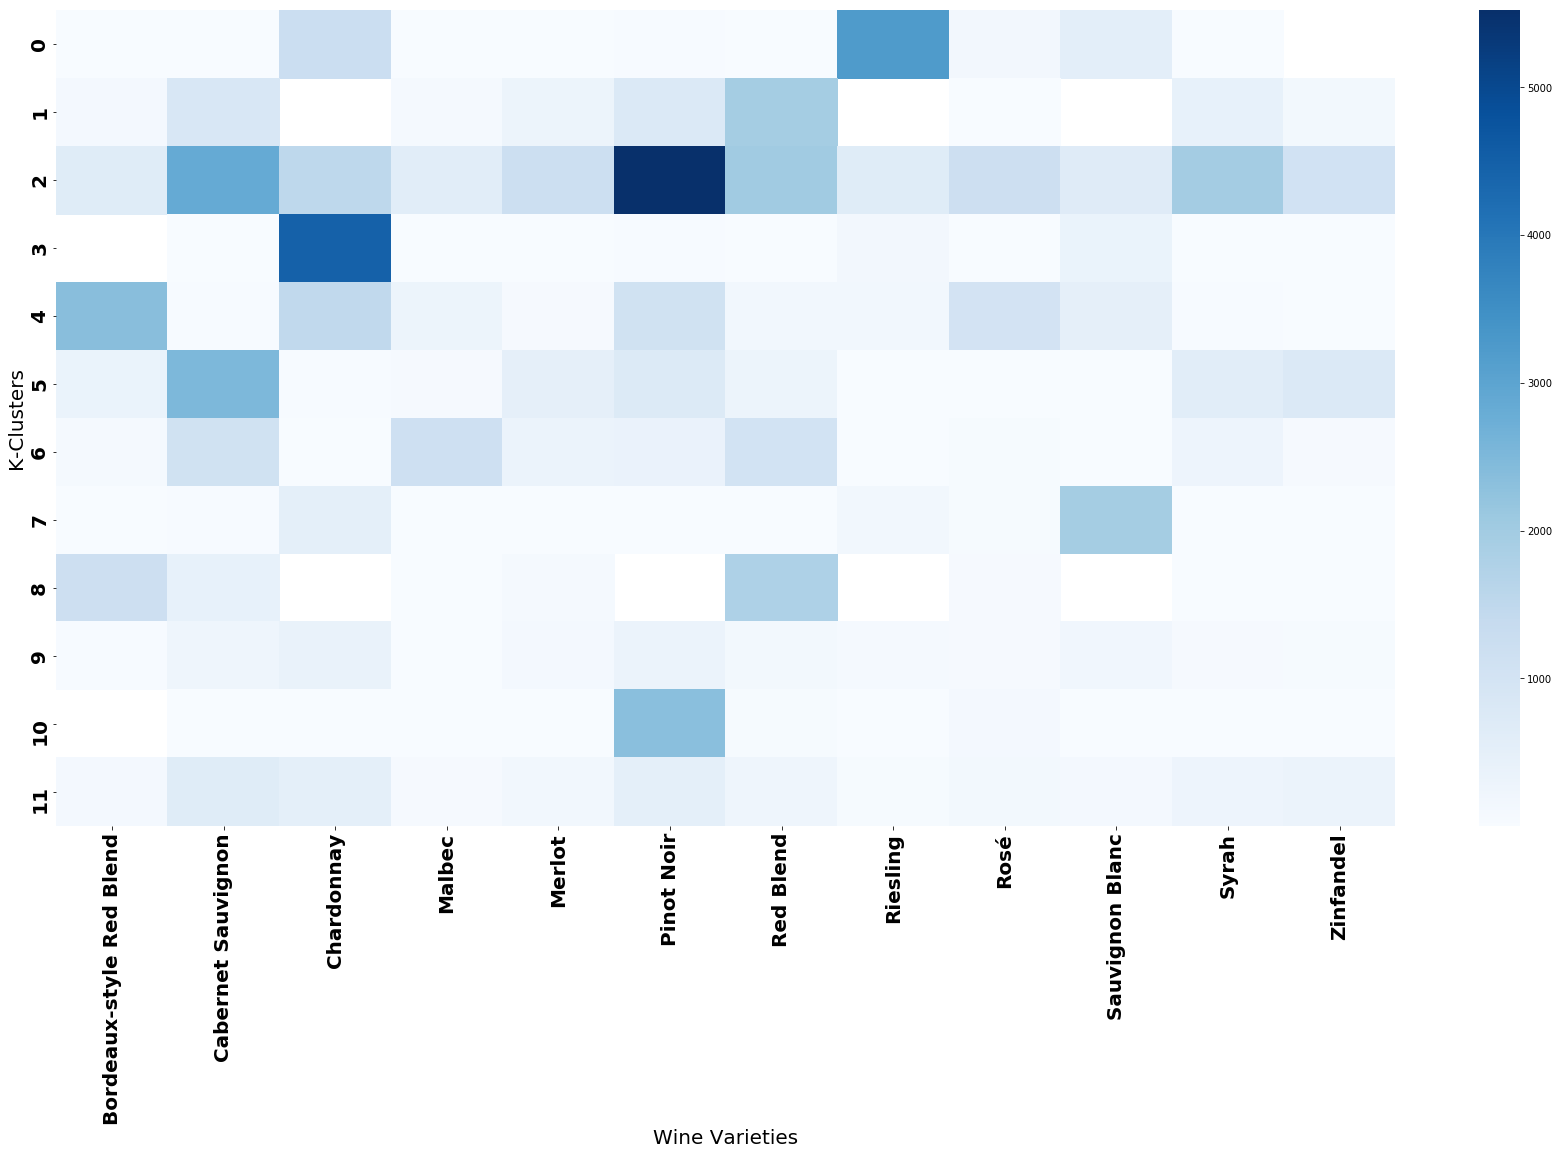

In [25]:
plt.show()

In [ ]:
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#stop_words = set(stopwords('english'))
#word_tokens = word_tokenize(descriptions)

In [ ]:
filename = 'kmeansmodel3.pk'
with open(filename, 'wb') as fh:
    pickle.dump(model, fh)

In [ ]:
filename = 'vectorizer3.pk'
with open(filename, 'wb') as fh:
    pickle.dump(vectorizer, fh)

In [ ]:
filename = 'kmeansmodel2.pk'
with open(filename, 'rb') as fh:
   b = pickle.load(fh)

In [ ]:
filename = 'vectorizer2.pk'
with open(filename, 'rb') as fh:
   c = pickle.load(fh)

In [ ]:
stopwords2 = nltk.corpus.stopwords.words('english')
stopwords2.extend(['flavor','flavors','nose','aromas','finish','palate', 'alongside','offers','feels','notes','structure','like','well'])

In [ ]:
print(stopwords2)

In [67]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
#stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer3 = TfidfVectorizer(stop_words = stopwords2, tokenizer = tokenize)
X3 = vectorizer3.fit_transform(descriptions)
words = vectorizer3.get_feature_names()

In [69]:
words

["'",
 "'brooding'",
 "'em",
 "'le",
 "'n'",
 "'nuff",
 "'s",
 "'sweet",
 "a'",
 "a'plenti",
 'aand',
 'aaron',
 'abacela',
 'abad',
 'abadia',
 'abandon',
 'abat',
 'abbey',
 'abbot',
 'abbott',
 'abbrevi',
 'abc',
 'abeil',
 'abeja',
 "abeja'",
 'abel',
 'abernathi',
 'aberr',
 'abetina',
 'abey',
 'abid',
 'abil',
 'abiou',
 'abl',
 'abli',
 'aboard',
 'abondant',
 'aborigin',
 'abound',
 'abouri',
 'abov',
 'abras',
 'abreu',
 'abroad',
 'abrupt',
 'abruptli',
 'abruzzo',
 'absberg',
 'absenc',
 'absent',
 'absolut',
 'absorb',
 'abtsberg',
 'abund',
 'abundantli',
 'abus',
 'abut',
 'abuzz',
 'abv',
 'acacia',
 'academ',
 'acadia',
 'acai',
 'acccess',
 'acceler',
 'accent',
 'accentu',
 'accept',
 'access',
 'accessibil',
 'accessor',
 'accetn',
 'accid',
 'accident',
 'acciderba',
 'acclaim',
 'accolad',
 'accommod',
 'accompain',
 'accompani',
 'accomplish',
 'accord',
 'accordingli',
 'accordion',
 'account',
 'accumul',
 'accur',
 'accus',
 'accustom',
 'ace',
 'aceri',
 'ace

In [95]:
kmeans = KMeans(n_clusters = 12, n_init = 5, n_jobs = -1)
kmeans.fit(X3)
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : pinot, noir, cherri, raspberri, silki, cola, thi, it', acid, drink, dri, wine, oak, year, red, fruit, show, rich, spice, complex, ha, textur, tannin, good, light, crisp, eleg, ripe, sandalwood, sweet, tart, note, fine, bodi, vineyard, next, soft, nice, mushroom, delici, one, offer, give, smoki, currant, littl, earthi, mouth, pie, pomegran, black, bottl, veri, simpl, balanc, cranberri, strawberri, delic, candi, spici, pretti, made, structur, palat, bit, age, style, yet, vanilla, cellar, make, hint, price, persimmon, brisk, best, young, there', fresh, tast, mouthfeel, licoric, valley, sour, cinnamon, color, fruiti, full, pepper, long, alcohol, love, berri, herb, aroma, bright, plum, easi, suggest, mark, heavi, develop, big, vintag, great, jam, new, lot, dark, medium, that', toast, pleasant, decant, slightli, cool, six, mocha, fill, savori, ro, feel, jammi, tannic, touch, forward, concentr, come, lack, suppl, clean, beauti, california, oregon, power, although, also, earth, produc, tea

In [103]:
common_words = kmeans.cluster_centers_.argsort()[:,:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : pinot, noir, cherri, raspberri, silki, cola, thi, it', acid, drink
1 : appl, citru, lemon, thi, palat, fresh, green, lime, aroma, acid
2 : riesl, dri, lime, peach, lemon, it', miner, thi, acid, honey
3 : wine, age, fruit, structur, wood, tannin, drink, ha, thi, rich
4 : berri, aroma, plum, herbal, feel, palat, thi, note, fruit, oak
5 : cabernet, sauvignon, merlot, blend, franc, petit, verdot, thi, black, malbec
6 : black, alongsid, palat, tannin, aroma, cherri, offer, pepper, sangioves, spice
7 : bodi, full, medium, wine, thi, textur, aroma, cherri, fruit, ripe
8 : blackberri, it', currant, cherri, tannin, dri, sweet, thi, drink, wine
9 : wine, fruiti, acid, drink, crisp, attract, readi, ha, fruit, thi
10 : chardonnay, pineappl, butter, toast, oak, vanilla, acid, tropic, thi, sweet
11 : fruit, thi, wine, cherri, black, palat, aroma, tannin, red, spice


In [132]:
v_df['cluster']=model.labels_
clusters = v_df.groupby(['cluster', 'variety']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'variety'), ax = ax2, cmap = 'GnBu')

ax2.set_xlabel('variety', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")

/Users/alexandriacabello/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


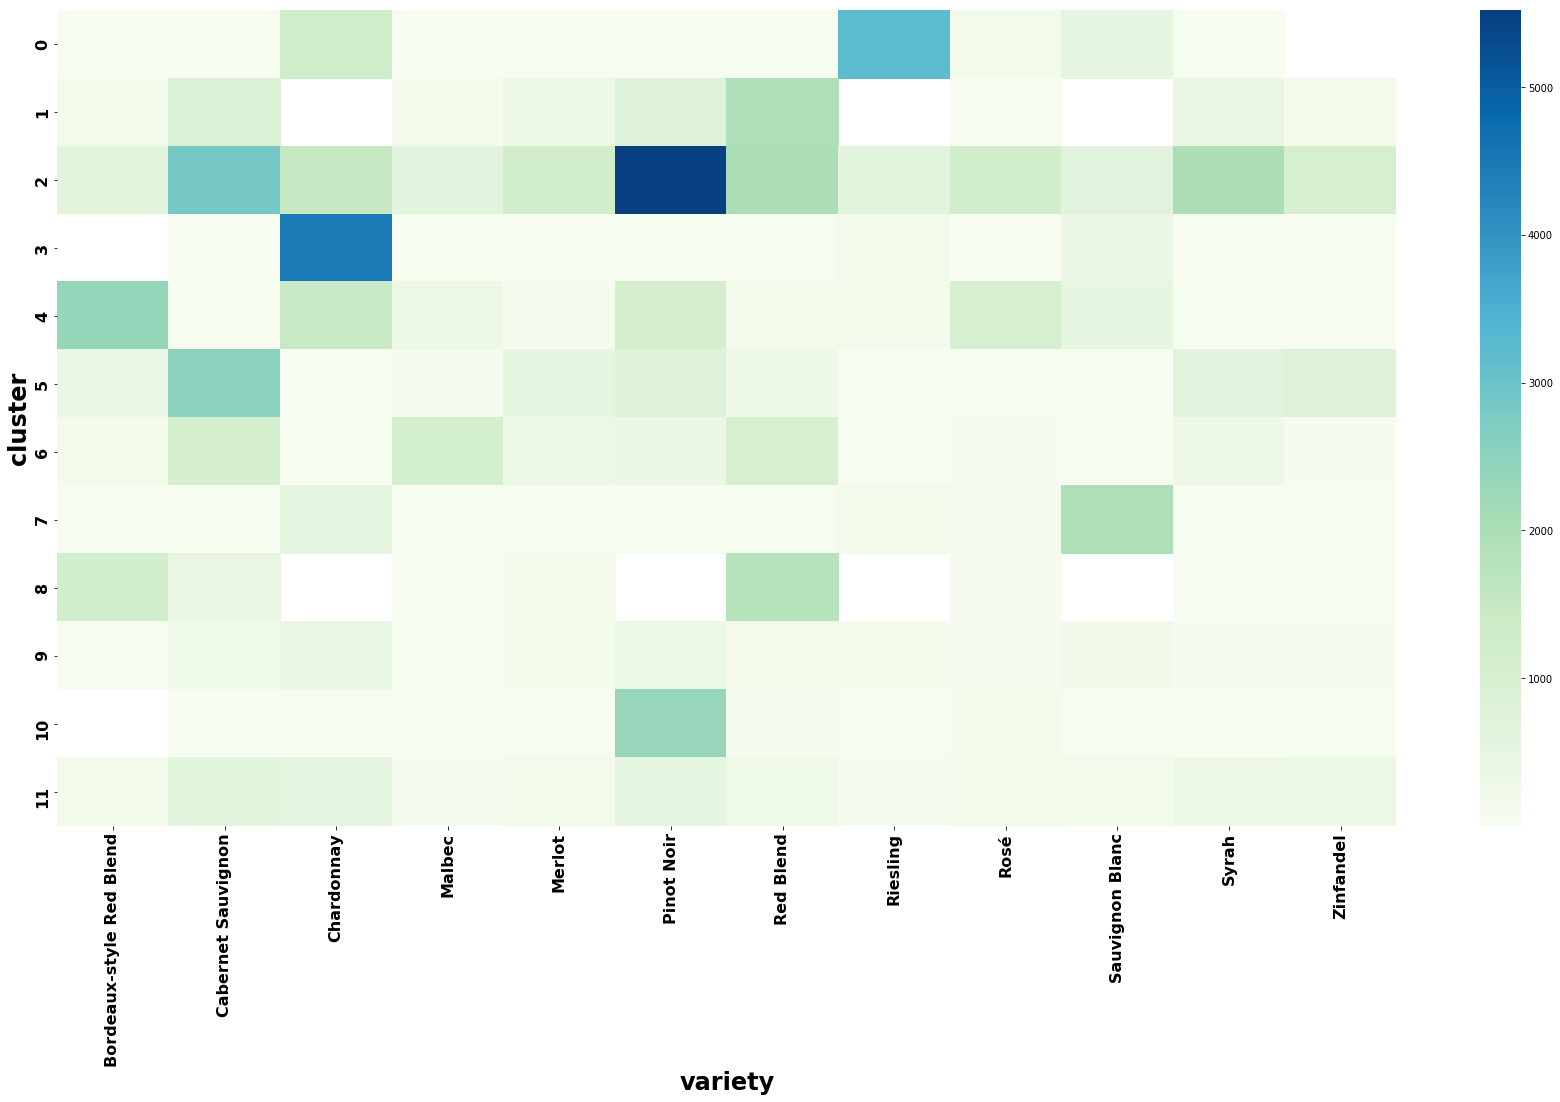

In [133]:
plt.show()

In [73]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.decomposition import TruncatedSVD

In [155]:
wine_knn = wine_df.copy()

In [156]:
wine_knn

,points,title,description,taster_name,taster_twitter_handle,price,designation,variety,region_1,region_2,province,country,winery
0,84,Broke Ass 2009 Red Malbec-Syrah (Mendoza),"Crimson in color but also translucent, with a ...",Michael Schachner,@wineschach,4.0,Red,Malbec-Syrah,Mendoza,NaN,Mendoza Province,Argentina,Broke Ass
1,84,Terrenal 2010 Cabernet Sauvignon (Yecla),This opens with standard cherry and berry arom...,Michael Schachner,@wineschach,4.0,NaN,Cabernet Sauvignon,Yecla,NaN,Levante,Spain,Terrenal
2,86,Cramele Recas 2011 UnWineD Pinot Grigio (Viile...,Notes of sun-dried hay and green flower highli...,Anna Lee C. Iijima,NaN,4.0,UnWineD,Pinot Grigio,NaN,NaN,Viile Timisului,Romania,Cramele Recas
3,86,Bandit NV Merlot (California),"There's a lot going on in this Merlot, which i...",NaN,NaN,4.0,NaN,Merlot,California,California Other,California,United States,Bandit
4,82,Felix Solis 2012 Flirty Bird White (Vino de la...,"Tropical fruit and citrus aromas aren't bad, b...",Michael Schachner,@wineschach,4.0,Flirty Bird,White Blend,Vino de la Tierra de Castilla,NaN,Central Spain,Spain,Felix Solis
5,84,Terrenal 2010 Estate Bottled Tempranillo (Yecla),"Nice on the nose, this has a leafy note and a ...",Michael Schachner,@wineschach,4.0,Estate Bottled,Tempranillo,Yecla,NaN,Levante,Spain,Terrenal
6,84,Bandit NV Merlot (California),"A good everyday Merlot, dry and rich in tannin...",NaN,NaN,4.0,NaN,Merlot,California,California Other,California,United States,Bandit
7,83,Pam's Cuties NV Unoaked Chardonnay (California),"Sweet and fruity, this canned wine feels soft ...",Jim Gordon,@gordone_cellars,4.0,Unoaked,Chardonnay,California,California Other,California,United States,Pam's Cuties
8,85,Dancing Coyote 2015 White (Clarksburg),"Fruity, soft and rather sweet, this wine smell...",Jim Gordon,@gordone_cellars,4.0,NaN,White Blend,Clarksburg,Central Valley,California,United States,Dancing Coyote
9,85,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Berry and cherry aromas are surprisingly sturd...,Michael Schachner,@wineschach,4.0,Flirty Bird,Syrah,Vino de la Tierra de Castilla,NaN,Central Spain,Spain,Felix Solis


In [157]:
col = ['province','variety','points']
col

['province', 'variety', 'points']

In [158]:
wine_col = wine_knn[col]
wine_col.head(2)
wine_col.shape

(111511, 3)

In [159]:
wine_drop_null = wine_col.dropna(axis=0)
wine_drop_null.head(2)
wine_drop_null.shape

(111511, 3)

In [160]:
wine_no_dup=wine_drop_null.drop_duplicates(['province','variety'])
wine_no_dup.shape

(4012, 3)

In [165]:
wine_points = wine_no_dup[wine_no_dup['points'] >85]
wine_points.shape

(2639, 3)

In [166]:
wine_pivot = wine_points.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot

province,Achaia,Aconcagua Costa,Aconcagua Valley,Aegean,Agioritikos,Ahr,Alenquer,Alentejano,Alentejo,Alenteo,...,Wellington,Western Australia,Western Cape,Wiener Gemischter Satz,Württemberg,Zenata,Österreichischer Perlwein,Österreichischer Sekt,Štajerska,Župa
variety,,,,,,,,,,,,,,,,,,,,,
Abouriou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agiorgitiko,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aglianico,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albanello,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albariño,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Albarossa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alfrocheiro,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alicante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Alicante Bouschet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86.0,90.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
wine_pivot_matrix = csr_matrix(wine_pivot)
wine_pivot_matrix

<599x390 sparse matrix of type '<class 'numpy.float64'>'
	with 2639 stored elements in Compressed Sparse Row format>

In [78]:
print(wine_pivot_matrix)

  (0, 314)	87.0
  (1, 16)	87.0
  (1, 82)	88.0
  (1, 227)	86.0
  (1, 255)	88.0
  (1, 258)	86.0
  (2, 48)	90.0
  (2, 147)	91.0
  (3, 303)	86.0
  (4, 48)	88.0
  (4, 199)	86.0
  (4, 206)	86.0
  (4, 233)	89.0
  (4, 246)	89.0
  (4, 331)	87.0
  (4, 349)	87.0
  (4, 376)	88.0
  (5, 264)	88.0
  (6, 103)	90.0
  (6, 328)	86.0
  (7, 303)	87.0
  (7, 344)	87.0
  (8, 7)	86.0
  (8, 8)	90.0
  (8, 115)	89.0
  :	:
  (588, 222)	87.0
  (589, 170)	89.0
  (590, 334)	87.0
  (591, 303)	86.0
  (592, 332)	89.0
  (593, 332)	91.0
  (594, 246)	86.0
  (594, 311)	88.0
  (594, 376)	91.0
  (595, 162)	88.0
  (596, 23)	90.0
  (596, 55)	89.0
  (596, 155)	86.0
  (596, 164)	90.0
  (596, 233)	87.0
  (596, 235)	86.0
  (596, 324)	87.0
  (596, 332)	90.0
  (596, 356)	88.0
  (596, 367)	88.0
  (596, 368)	88.0
  (596, 376)	86.0
  (596, 378)	86.0
  (597, 3)	86.0
  (598, 337)	88.0


In [174]:
knn = NearestNeighbors(n_neighbors=10,algorithm= 'brute', metric= 'euclidean')
model_knn = knn.fit(wine_pivot)

In [184]:
wine_pivot.iloc[query_index,:]

province
Achaia                          0.0
Aconcagua Costa                 0.0
Aconcagua Valley                0.0
Aegean                          0.0
Agioritikos                     0.0
Ahr                             0.0
Alenquer                        0.0
Alentejano                      0.0
Alentejo                        0.0
Alenteo                         0.0
Alsace                          0.0
America                         0.0
Amyndeon                        0.0
Andalucia                       0.0
Ankara                          0.0
Apalta                          0.0
Arcadia                         0.0
Arizona                         0.0
Armenia                         0.0
Atalanti Valley                 0.0
Atlantida                       0.0
Attica                          0.0
Australia Other                 0.0
Austria                         0.0
Awatere Valley                  0.0
Baden                           0.0
Bairrada                        0.0
Beaujolais         

In [183]:
import numpy as np
query_index = np.random.choice(wine_pivot.shape[0])
distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)
for i in range(0, len(distance.flatten())):
    if  i == 0:
        print('Recmmendation for {0}:\n'.format(wine_pivot.index[query_index]))
    else:
        print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))

KeyError: 'province'